# Predicting sales price of Bulldozers using Machine Learning

The goal of this notebook is to create a machine learning model that can effectively predict the sales price of BullDozers based on the previous selling prices of them.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much a similar bulldozer was sold for?

## 2. Data

The data comes from Kaggle Bulldozer price prediction competition.

## 3. Evaluation

The evaluation metrics of this model is the RMSLE (Root Mean Squared Log Error) between the actual and predicted auction prices.

## 4. Features

The feature dictionary can be found under the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Uncomment to view the feature dictionary

# feature_dict = pd.read_excel("./data/Data Dictionary.xlsx")
# feature_dict[["Variable", "Description"]]

In [ ]:
df = pd.read_csv("./data/TrainAndValid.csv", low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<Axes: ylabel='Frequency'>

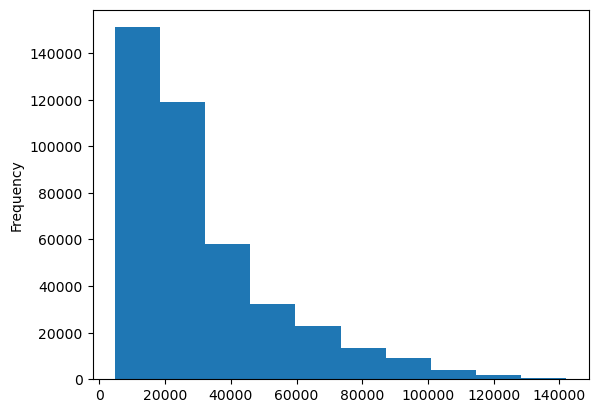

In [6]:
df.SalePrice.plot.hist()

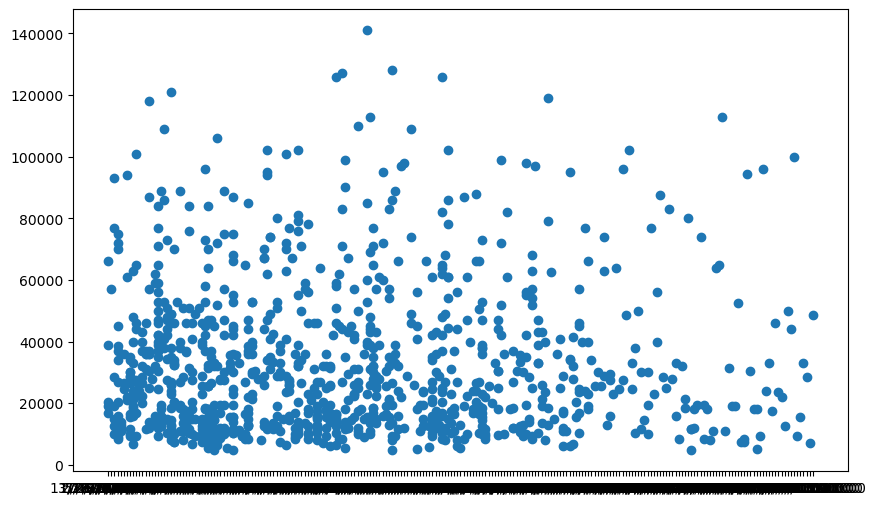

In [7]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [8]:
df["saledate"][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [9]:
type(df['saledate'][:1000][0])

str

### Parse Date

When working with time series data we must enrich the time & date components as much as possible.

`parse_date` is the parameter which when provided with the column name containing time series data automatically converts that column's value to datetime

In [77]:
df = pd.read_csv("./data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [11]:
df.saledate.dtype

dtype('<M8[ns]')

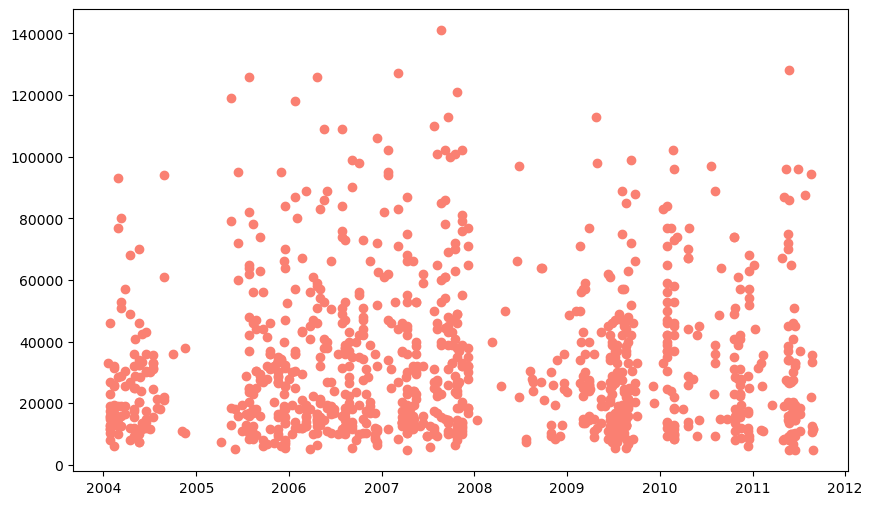

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000], color=["salmon"])

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [15]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a copy of original DF

In [16]:
df_temp = df.copy()

In [17]:
df_temp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Feature Engineering

#### Add datetime parameters for `saledate` column

In [18]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.day_of_week
df_temp['saleDayOfYear'] = df_temp.saledate.dt.day_of_year

In [19]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# Now we've enriched our DataFrame with date time features, we can remove the saledate column
df_temp.drop(["saledate"], inplace=True, axis=1)

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Converting string to categories

converting to pandas categories is one way of converting our data to numbers

In [18]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label]= content.astype("category").cat.as_ordered()

In [19]:
df_temp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [20]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [21]:
df_temp.state.cat.codes

0         43
1          8
2          8
3          8
4          8
          ..
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

In [22]:
df_temp.isna().sum()/len(df_temp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

#### Save preprocessed data

In [14]:
# df_temp.to_csv(
#     "processed_data/train_temp.csv",
#     index=False
# )

In [15]:
# # Load processed dat
# # a
# df_temp = pd.read_csv("./processed_data/train_temp.csv", low_memory=False)

In [23]:
df_temp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

### Fill Missing Values

#### Fill numeric missing values first

In [24]:
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [26]:
# for all numeric dtypes if missing values exists then fill it with its median 
# and mark is_missing as true to indicate missing value is imputed here
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label + "_is_missing"] = pd.isnull(content)
            
            df_temp[label] = content.fillna(content.median())

In [27]:
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [28]:
df_temp.isna().sum()/len(df_temp)

SalesID                                0.000000
SalePrice                              0.000000
MachineID                              0.000000
ModelID                                0.000000
datasource                             0.000000
auctioneerID                           0.000000
YearMade                               0.000000
MachineHoursCurrentMeter               0.000000
UsageBand                              0.821492
fiModelDesc                            0.000000
fiBaseModel                            0.000000
fiSecondaryDesc                        0.340993
fiModelSeries                          0.857845
fiModelDescriptor                      0.818715
ProductSize                            0.524851
fiProductClassDesc                     0.000000
state                                  0.000000
ProductGroup                           0.000000
ProductGroupDesc                       0.000000
Drive_System                           0.740520
Enclosure                              0

In [33]:
for label, content in df_temp.items():
    if pd.isnull(content).sum():
        print(f"{label}\t\t\t{content.dtype}")

UsageBand			category
fiSecondaryDesc			category
fiModelSeries			category
fiModelDescriptor			category
ProductSize			category
Drive_System			category
Enclosure			category
Forks			category
Pad_Type			category
Ride_Control			category
Stick			category
Transmission			category
Turbocharged			category
Blade_Extension			category
Blade_Width			category
Enclosure_Type			category
Engine_Horsepower			category
Hydraulics			category
Pushblock			category
Ripper			category
Scarifier			category
Tip_Control			category
Tire_Size			category
Coupler			category
Coupler_System			category
Grouser_Tracks			category
Hydraulics_Flow			category
Track_Type			category
Undercarriage_Pad_Width			category
Stick_Length			category
Thumb			category
Pattern_Changer			category
Grouser_Type			category
Backhoe_Mounting			category
Blade_Type			category
Travel_Controls			category
Differential_Type			category
Steering_Controls			category


### Filling missing categorical values

#### Turn categorical variables into numbers and fill missing values

`+1` is done b/c categorical code of a missing value is -1 and we don't want that so -1 + 1 = 0 will be the assigned numeric value

In [37]:
pd.Categorical(df_temp.UsageBand).codes + 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [38]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binary column indicating whether missing value was present in the original data frame
        
        df_temp[label + "is_missing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1

In [53]:
df_temp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=103)


In [49]:
df_temp.isna().sum()[:10]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
dtype: int64

In [50]:
df_temp.to_csv(
    "processed_data/train_temp.csv",
    index=False
)

Now since our data has no missing values and is all  numeric we can fit a model to our data

### Modelling

In [51]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_jobs = -1,
    random_state = 42
)

model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

CPU times: total: 32min 59s
Wall time: 4min 37s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
model.score(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

0.9875468079970562

### Splitting Data

According to data description the train test is till 2011 and 2012 data is our  validation data. So we will split our data into train and validation datasets.

In [57]:
for col in df_temp.columns:
    print(col)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing
UsageBandis_missing
fiModelDescis_missing
fiBaseModelis_missing
fiSecondaryDescis_missing
fiModelSeriesis_missing
fiModelDescriptoris_missing
ProductSizeis_missing
fiProductClassDescis_missing
stateis_missing
ProductGroup

In [58]:
df_train = df_temp[df_temp.saleYear != 2012]
df_val = df_temp[df_temp.saleYear == 2012]

In [59]:
df_train.shape, df_val.shape

((401125, 103), (11573, 103))

In [61]:
df_val.saleYear

401125    2012
401126    2012
401127    2012
401128    2012
401129    2012
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 11573, dtype: int64

In [62]:
df_train.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleYear, Length: 401125, dtype: int64

In [63]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_val, y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

This approach is incorrect because before splitting our data, the future or test values are spilling inside our train values which is incorrect. So:

1. Convert categorical values to numbers on the entire dataset (train + test) so that categorical encodings are same across. If combined conversion is not possible then column names must be same in both the datasets.
2. FIll missing numerical values on test and train sets separately so that that the test data doesn't spill over in training data.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [82]:
df_temp = df.copy()

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

1. Enrich data & time into our data
2. convert non numerical values to pandas category
3. fill missing values of categories with its code & add a binary column
4. split data into train and valid sets
5. fill missing numerical values on both the data sets separately

In [83]:
# 1. Enrich data & time into our data

df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.day_of_week
df_temp["saleDayOfYear"] = df_temp.saledate.dt.day_of_year

df_temp.drop("saledate", axis=1, inplace=True)

In [84]:
# 2. convert non numerical values to pandas category
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [85]:
df_temp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [86]:
# 3. fill missing values of categories with its code & add a binary column

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary
        df_temp[label + "_is_missing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1

In [91]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(44), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 69.3 MB


In [90]:
for item in df_temp.isna().sum():
    print(item)

0
0
0
0
0
20136
0
265194
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [105]:
# 4. split data into train and valid sets

df_train = df_temp[df_temp.saleYear != 2012]
df_valid = df_temp[df_temp.saleYear == 2012]


In [106]:
df_train.isna().sum()[:10]


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                        0
fiModelDesc                      0
dtype: int64

In [107]:
df_valid.isna().sum()[:10]


SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
YearMade                       0
MachineHoursCurrentMeter    6834
UsageBand                      0
fiModelDesc                    0
dtype: int64

In [108]:
# 5. fill missing numerical values on both the data sets separately

for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            df_train[label + "_is_missing"] = pd.isnull(content)
            df_train[label] = content.fillna(content.median())
            
for label, content in df_valid.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum() or label == "auctioneerID":
            df_valid[label + "_is_missing"] = pd.isnull(content)
            df_valid[label] = content.fillna(content.median())

C:\Users\asus\AppData\Local\Temp\ipykernel_13624\2452999897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label + "_is_missing"] = pd.isnull(content)
C:\Users\asus\AppData\Local\Temp\ipykernel_13624\2452999897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.fillna(content.median())
C:\Users\asus\AppData\Local\Temp\ipykernel_13624\2452999897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [109]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 0 to 401124
Columns: 103 entries, SalesID to MachineHoursCurrentMeter_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 71.2 MB


In [110]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 401125 to 412697
Columns: 103 entries, SalesID to MachineHoursCurrentMeter_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 2.1 MB


In [111]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [112]:
model = RandomForestRegressor(
    n_jobs = -1,
    random_state = 42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [113]:
model.score(X_train, y_train)

0.9875337343272359

In [114]:
model.score(X_valid, y_valid)

0.8731589629046507

### Building an Evaluation function

In [115]:
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, r2_score

def get_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    return {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, valid_preds),
        "Training RMSLE": root_mean_squared_log_error(y_train, train_preds),
        "Valid RMSLE": root_mean_squared_log_error(y_valid, valid_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, valid_preds),
    }

In [117]:
get_scores(model)

{'Training MAE': 1577.9991208974761,
 'Valid MAE': 6117.466147930529,
 'Training RMSLE': 0.08412560673596753,
 'Valid RMSLE': 0.2529091457830405,
 'Training R^2': 0.9875337343272359,
 'Valid R^2': 0.8731589629046507}

### Reducing Data

In [118]:
model = RandomForestRegressor(
    n_jobs = -1,
    random_state = 42,
    max_samples = 10000
)

model.fit(X_train, y_train)
get_scores(model)

{'Training MAE': 5552.395534334682,
 'Valid MAE': 7183.624927849305,
 'Training RMSLE': 0.25747159809234826,
 'Valid RMSLE': 0.2948809031110679,
 'Training R^2': 0.8609304910203928,
 'Valid R^2': 0.8320885393817002}

### Hyperparameter tuning with RandomSearchCV

In [128]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {
    "n_estimators": np.arange(10,100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "log2"],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(
    RandomForestRegressor(n_jobs = -1, random_state = 42),
    param_distributions=rs_grid,
    cv = 5,
    n_iter=50,
    verbose=1
)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=1)

In [129]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [130]:
get_scores(rs_model.best_estimator_)

{'Training MAE': 6315.758766381972,
 'Valid MAE': 7747.50374137373,
 'Training RMSLE': 0.2858920432340665,
 'Valid RMSLE': 0.3161710080929937,
 'Training R^2': 0.8218394479214611,
 'Valid R^2': 0.8049557623538768}

In [131]:
ideal_model = RandomForestRegressor(
    n_jobs=-1,
    n_estimators=40,
    min_samples_split=14,
    min_samples_leaf=1,
    max_samples=None,
    max_features=0.5,
    random_state=42
)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [132]:
get_scores(ideal_model)

{'Training MAE': 2957.4150690520996,
 'Valid MAE': 5961.820624423382,
 'Training RMSLE': 0.1448778353244902,
 'Valid RMSLE': 0.24741381557685588,
 'Training R^2': 0.9587698912187723,
 'Valid R^2': 0.881511614525004}

### Preprocessing Data (getting test dataset in the formal as our training dataset)

In [144]:
def preprocess_data(df):
    """
    performs transformations on df and returns transformed df
    """
    
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year

    df.drop("saledate", axis=1, inplace=True)
    
    # fill numeric values with median and categorical values with its code + 1
    
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
            
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum() or label == "auctioneerID":
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    return df

In [145]:
df_test = pd.read_csv("./data/Test.csv", low_memory=False, parse_dates=["saledate"])

In [146]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [147]:
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to MachineHoursCurrentMeter_is_missing
dtypes: bool(46), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [148]:
for col1,col2 in zip(X_train.columns, df_test.columns):
    print(f"{col1} \t {col2}")

SalesID 	 SalesID
MachineID 	 MachineID
ModelID 	 ModelID
datasource 	 datasource
auctioneerID 	 auctioneerID
YearMade 	 YearMade
MachineHoursCurrentMeter 	 MachineHoursCurrentMeter
UsageBand 	 UsageBand
fiModelDesc 	 fiModelDesc
fiBaseModel 	 fiBaseModel
fiSecondaryDesc 	 fiSecondaryDesc
fiModelSeries 	 fiModelSeries
fiModelDescriptor 	 fiModelDescriptor
ProductSize 	 ProductSize
fiProductClassDesc 	 fiProductClassDesc
state 	 state
ProductGroup 	 ProductGroup
ProductGroupDesc 	 ProductGroupDesc
Drive_System 	 Drive_System
Enclosure 	 Enclosure
Forks 	 Forks
Pad_Type 	 Pad_Type
Ride_Control 	 Ride_Control
Stick 	 Stick
Transmission 	 Transmission
Turbocharged 	 Turbocharged
Blade_Extension 	 Blade_Extension
Blade_Width 	 Blade_Width
Enclosure_Type 	 Enclosure_Type
Engine_Horsepower 	 Engine_Horsepower
Hydraulics 	 Hydraulics
Pushblock 	 Pushblock
Ripper 	 Ripper
Scarifier 	 Scarifier
Tip_Control 	 Tip_Control
Tire_Size 	 Tire_Size
Coupler 	 Coupler
Coupler_System 	 Coupler_System
Grou

In [149]:
ideal_model.predict(df_test)

array([17531.1479697 , 16286.41895419, 47874.62956033, ...,
       13675.46822859, 17417.00971613, 28012.93452567])

### Feature Importance

In [153]:
def plot_importances(columns, importances, n = 20):
    impo_df = (pd.DataFrame({"features": columns, "importances": importances})
          .sort_values("importances", ascending=True)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.barh(impo_df["features"][:n], impo_df["importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")

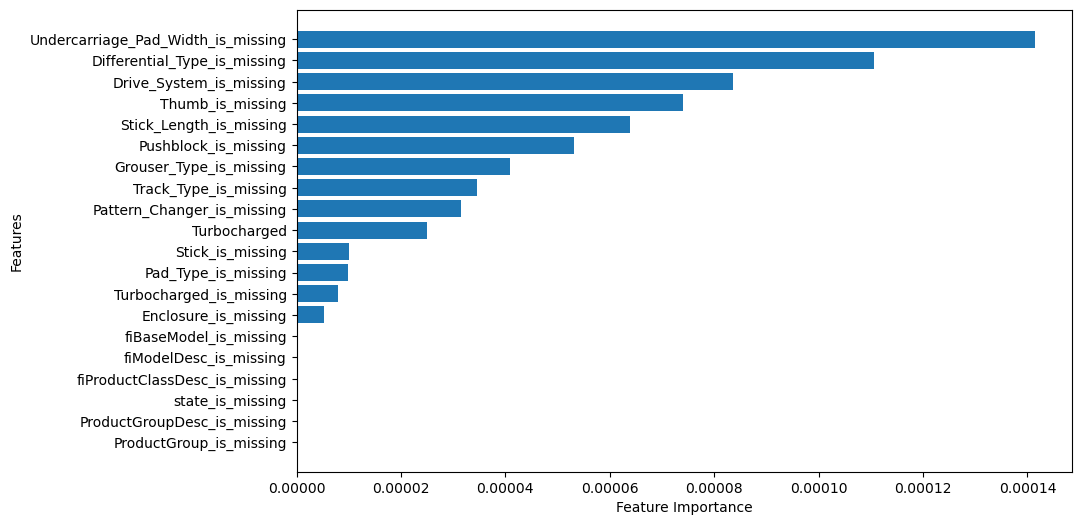

In [154]:
plot_importances(X_train.columns, ideal_model.feature_importances_)